<a href="https://colab.research.google.com/github/pela-andrea/people-analytics-case/blob/feat%2Fanalise-dados/scripts/03_analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estudo de Base de Dados RH – Case Técnico

#Introdução

Este notebook tem como objetivo explorar a base de dados de RH, buscando identificar padrões, inconsistências, e potenciais insights que possam apoiar a tomada de decisão.


#**Preparação Inicial**

##Declaração das LIBS

In [1]:
#Principais
import pandas as pd
import numpy as np

#Para visualização
import matplotlib.pyplot as plt
import seaborn as sns

#Para tratamento de datas e warnings
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

#Para salvar os arquivos gerados, localmente
from google.colab import files

##Configuração do pandas

In [2]:
# Exibir todas as colunas do dataframe
pd.set_option('display.max_columns', None)

##Importação e Extração dos dados

In [3]:
#Importando a base original diretamente do repositório GitHub
url = 'https://raw.githubusercontent.com/pela-andrea/people-analytics-case/main/data/base_corrigida.csv'

df = pd.read_csv(url, sep=';', decimal=',', encoding='utf-8')

In [4]:
df.head()

,ID do Colaborador,Cargo,Departamento,Localização,Salário,Data de Admissão,Data de Demissão,Está Ativo,Dias de Falta,Dias de Licença Médica,Dias de Férias Usufruídos,Banco de Horas,Horas Extras,Quantidade de Atrasos,Gênero,Estado Civil,Número de Dependentes,Nível de Escolaridade,Avaliação de Desempenho,Percentual de Bônus,Turno,Tipo de Contrato,Centro de Custo,Status de Conformidade,Plano de Saúde,Email,Tempo de Empresa (anos),Período de Experiência Concluído,ID do Gestor,Data da Última Promoção,Data do Último Treinamento,Flag: Promoção após Demissão,Flag: Demissão antes de Admissão,Flag: Treinamento Antes da Admissão
0,EMP_00001,Gerente de RH,Financeiro,Salvador,6993.43,2022-02-26,NaN,Sim,3,2,13,52,20,6,Outro,Viúvo(a),4,Graduação,5,7.58,Manhã,Permanente,CC013,Em conformidade,Padrão,emp_00001@company.com,3.34,Sim,EMP_00495,NaN,2024-07-04,Não,Não,Não
1,EMP_00002,Engenheiro de Dados,Marketing,Belo Horizonte,5723.47,2023-03-04,NaN,Sim,1,1,14,-80,86,6,Masculino,Casado(a),1,Graduação,5,8.72,Manhã,Temporário,CC026,Em conformidade,Básico,emp_00002@company.com,2.33,Sim,EMP_00345,2024-07-21,2024-02-01,Não,Não,Não
2,EMP_00003,Desenvolvedor Python,Operações,Salvador,7295.38,2010-09-01,NaN,Sim,3,5,25,149,23,1,Feminino,Divorciado(a),1,Mestrado,4,7.93,Manhã,Permanente,CC010,Em conformidade,Básico,emp_00003@company.com,14.84,Sim,EMP_00306,2014-10-18,2024-01-11,Não,Não,Não
3,EMP_00004,Analista Financeiro,Operações,Porto Alegre,9046.06,2020-02-26,NaN,Sim,2,1,21,-92,22,5,Masculino,Casado(a),0,Graduação,3,5.27,Manhã,Permanente,CC008,Em conformidade,Padrão,emp_00004@company.com,5.35,Sim,EMP_00971,NaN,2025-01-05,Não,Não,Não
4,EMP_00005,Engenheiro de Dados,Recursos Humanos,Curitiba,5531.69,2011-06-22,NaN,Sim,1,2,15,93,72,3,Masculino,Solteiro(a),0,Graduação,2,10.95,Tarde,Permanente,CC013,Em conformidade,Premium,emp_00005@company.com,14.03,Sim,EMP_00024,NaN,2025-01-19,Não,Não,Não


Serão necessárias algumas alterações e tratamentos na tabela original

Garantindo que o campo Percentual Bonus seja em percentual


In [5]:
df['Percentual de Bônus'] = df['Percentual de Bônus'].apply(
    lambda x: x / 100 if pd.notnull(x) else x
)

In [6]:
df.head()

,ID do Colaborador,Cargo,Departamento,Localização,Salário,Data de Admissão,Data de Demissão,Está Ativo,Dias de Falta,Dias de Licença Médica,Dias de Férias Usufruídos,Banco de Horas,Horas Extras,Quantidade de Atrasos,Gênero,Estado Civil,Número de Dependentes,Nível de Escolaridade,Avaliação de Desempenho,Percentual de Bônus,Turno,Tipo de Contrato,Centro de Custo,Status de Conformidade,Plano de Saúde,Email,Tempo de Empresa (anos),Período de Experiência Concluído,ID do Gestor,Data da Última Promoção,Data do Último Treinamento,Flag: Promoção após Demissão,Flag: Demissão antes de Admissão,Flag: Treinamento Antes da Admissão
0,EMP_00001,Gerente de RH,Financeiro,Salvador,6993.43,2022-02-26,NaN,Sim,3,2,13,52,20,6,Outro,Viúvo(a),4,Graduação,5,0.0758,Manhã,Permanente,CC013,Em conformidade,Padrão,emp_00001@company.com,3.34,Sim,EMP_00495,NaN,2024-07-04,Não,Não,Não
1,EMP_00002,Engenheiro de Dados,Marketing,Belo Horizonte,5723.47,2023-03-04,NaN,Sim,1,1,14,-80,86,6,Masculino,Casado(a),1,Graduação,5,0.0872,Manhã,Temporário,CC026,Em conformidade,Básico,emp_00002@company.com,2.33,Sim,EMP_00345,2024-07-21,2024-02-01,Não,Não,Não
2,EMP_00003,Desenvolvedor Python,Operações,Salvador,7295.38,2010-09-01,NaN,Sim,3,5,25,149,23,1,Feminino,Divorciado(a),1,Mestrado,4,0.0793,Manhã,Permanente,CC010,Em conformidade,Básico,emp_00003@company.com,14.84,Sim,EMP_00306,2014-10-18,2024-01-11,Não,Não,Não
3,EMP_00004,Analista Financeiro,Operações,Porto Alegre,9046.06,2020-02-26,NaN,Sim,2,1,21,-92,22,5,Masculino,Casado(a),0,Graduação,3,0.0527,Manhã,Permanente,CC008,Em conformidade,Padrão,emp_00004@company.com,5.35,Sim,EMP_00971,NaN,2025-01-05,Não,Não,Não
4,EMP_00005,Engenheiro de Dados,Recursos Humanos,Curitiba,5531.69,2011-06-22,NaN,Sim,1,2,15,93,72,3,Masculino,Solteiro(a),0,Graduação,2,0.1095,Tarde,Permanente,CC013,Em conformidade,Premium,emp_00005@company.com,14.03,Sim,EMP_00024,NaN,2025-01-19,Não,Não,Não


Trocar o termo "Recursos Humanos" para "RH" na coluna Cargo

In [7]:
df['Departamento'] = df['Departamento'].str.replace('Recursos Humanos', 'RH', regex=False)

In [8]:
df.head()

,ID do Colaborador,Cargo,Departamento,Localização,Salário,Data de Admissão,Data de Demissão,Está Ativo,Dias de Falta,Dias de Licença Médica,Dias de Férias Usufruídos,Banco de Horas,Horas Extras,Quantidade de Atrasos,Gênero,Estado Civil,Número de Dependentes,Nível de Escolaridade,Avaliação de Desempenho,Percentual de Bônus,Turno,Tipo de Contrato,Centro de Custo,Status de Conformidade,Plano de Saúde,Email,Tempo de Empresa (anos),Período de Experiência Concluído,ID do Gestor,Data da Última Promoção,Data do Último Treinamento,Flag: Promoção após Demissão,Flag: Demissão antes de Admissão,Flag: Treinamento Antes da Admissão
0,EMP_00001,Gerente de RH,Financeiro,Salvador,6993.43,2022-02-26,NaN,Sim,3,2,13,52,20,6,Outro,Viúvo(a),4,Graduação,5,0.0758,Manhã,Permanente,CC013,Em conformidade,Padrão,emp_00001@company.com,3.34,Sim,EMP_00495,NaN,2024-07-04,Não,Não,Não
1,EMP_00002,Engenheiro de Dados,Marketing,Belo Horizonte,5723.47,2023-03-04,NaN,Sim,1,1,14,-80,86,6,Masculino,Casado(a),1,Graduação,5,0.0872,Manhã,Temporário,CC026,Em conformidade,Básico,emp_00002@company.com,2.33,Sim,EMP_00345,2024-07-21,2024-02-01,Não,Não,Não
2,EMP_00003,Desenvolvedor Python,Operações,Salvador,7295.38,2010-09-01,NaN,Sim,3,5,25,149,23,1,Feminino,Divorciado(a),1,Mestrado,4,0.0793,Manhã,Permanente,CC010,Em conformidade,Básico,emp_00003@company.com,14.84,Sim,EMP_00306,2014-10-18,2024-01-11,Não,Não,Não
3,EMP_00004,Analista Financeiro,Operações,Porto Alegre,9046.06,2020-02-26,NaN,Sim,2,1,21,-92,22,5,Masculino,Casado(a),0,Graduação,3,0.0527,Manhã,Permanente,CC008,Em conformidade,Padrão,emp_00004@company.com,5.35,Sim,EMP_00971,NaN,2025-01-05,Não,Não,Não
4,EMP_00005,Engenheiro de Dados,RH,Curitiba,5531.69,2011-06-22,NaN,Sim,1,2,15,93,72,3,Masculino,Solteiro(a),0,Graduação,2,0.1095,Tarde,Permanente,CC013,Em conformidade,Premium,emp_00005@company.com,14.03,Sim,EMP_00024,NaN,2025-01-19,Não,Não,Não


#Análise

In [9]:
# Estilo de gráfico
sns.set(style="whitegrid", palette="pastel")

##Análise de Salário

In [10]:
#Criar correlação com todas as variáveis numéricas
numeric_cols = df.select_dtypes(include='number')
correlation = numeric_cols.corr()

correlation['Salário'].sort_values(ascending=False)

,Salário
Salário,1.000000
Tempo de Empresa (anos),0.006205
Dias de Licença Médica,0.005193
Avaliação de Desempenho,0.005184
Percentual de Bônus,0.004667
Número de Dependentes,0.003581
Banco de Horas,0.002649
Quantidade de Atrasos,0.001167
Horas Extras,-0.001304
Dias de Férias Usufruídos,-0.001571


- **Nenhuma das variáveis numéricas tem correlação linear significativa com o salário**.
- Isso **não significa** que não existam relações, mas sim que:
    - **Não são lineares**
    - Ou **não estão diretamente ligadas** ao salário na base
    - Ou ainda que o salário pode ser **determinado por outras variáveis categóricas**, como Cargo ou Departamento

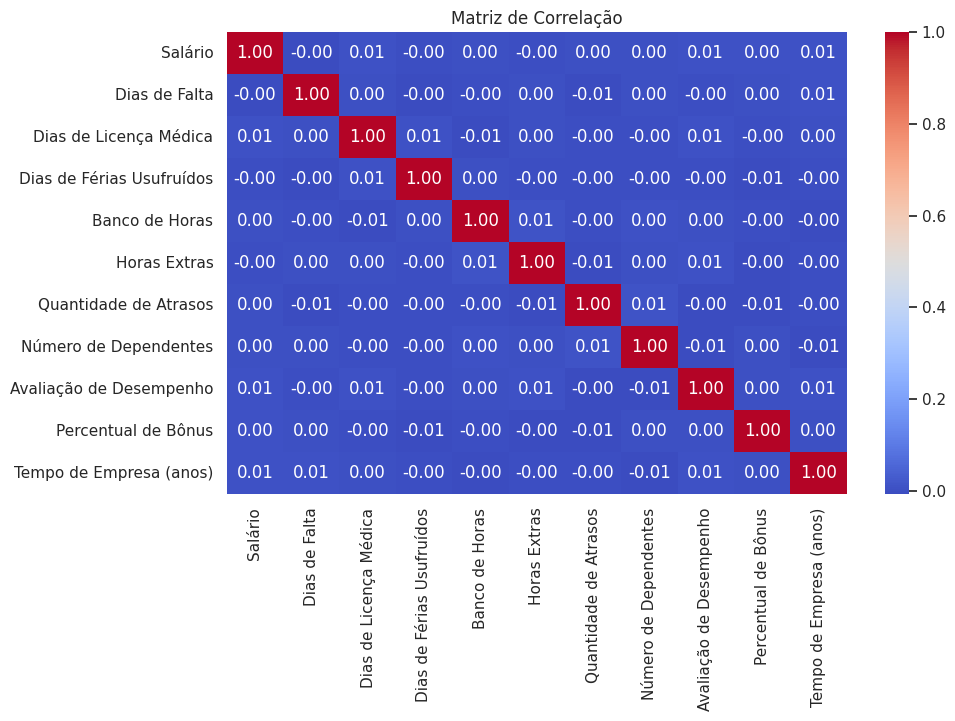

In [11]:
#Matriz de Correlação para salário
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()


Neste caso, como podemos observar não há variável que representa alguma relação com salário

In [14]:
#Explorar salário por categoria, que pode ser mais revelador
df.groupby("Cargo")["Salário"].mean().sort_values(ascending=False)
df.groupby("Departamento")["Salário"].mean().sort_values(ascending=False)
df.groupby("Nível de Escolaridade")["Salário"].mean().sort_values(ascending=False)


,Salário
Nível de Escolaridade,
Doutorado,556195.364555
Mestrado,547838.797372
Graduação,547174.721147
Ensino Médio,546741.734978


In [16]:
#verificar quantas pessoas há por cateogria
df["Nível de Escolaridade"].value_counts()


,count
Nível de Escolaridade,
Graduação,25049
Ensino Médio,14995
Mestrado,7383
Doutorado,2573


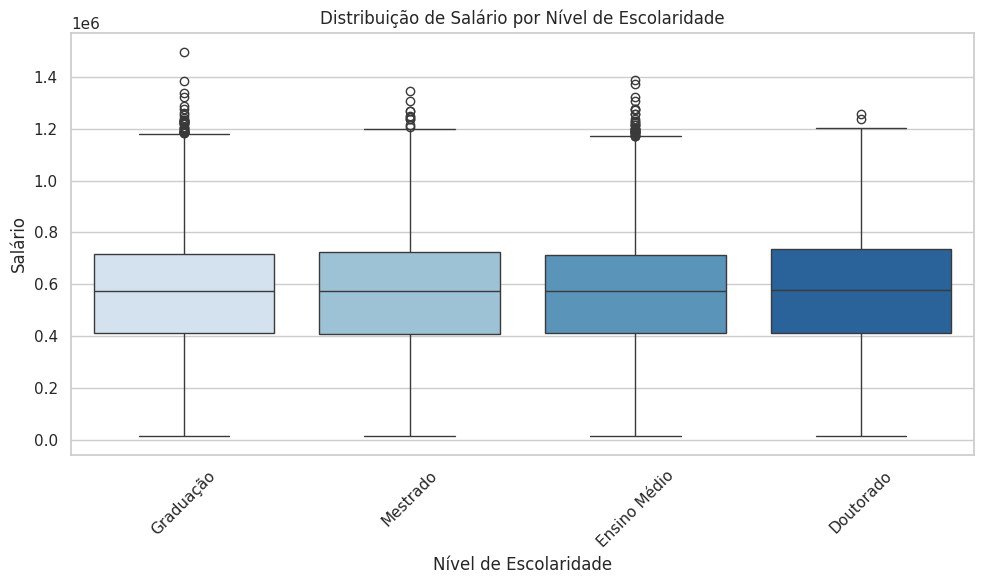

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Nível de Escolaridade", y="Salário", palette="Blues")
plt.title("Distribuição de Salário por Nível de Escolaridade")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 O que isso indica?
Apesar de os valores não variarem tanto assim, há uma tendência crescente: quanto maior o nível de escolaridade, ligeiramente maior o salário médio.

Mas o que chama atenção aqui é:

A diferença entre Ensino Médio e Doutorado é pequena (menos de R$ 10.000)

Isso pode indicar que:

O salário na empresa não depende fortemente da escolaridade

Ou que os cargos com maiores salários não exigem necessariamente maior formação

Ou ainda que há poucas pessoas com Doutorado/Mestrado, distorcendo a média

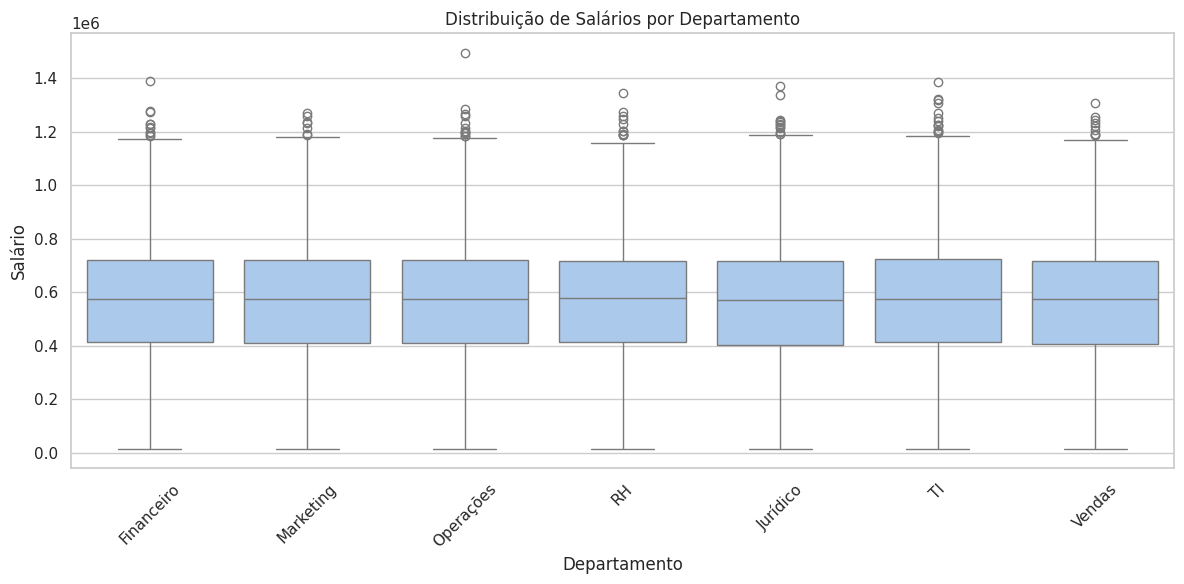

In [12]:
#Comparativo de Salário por Departamento
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Departamento", y="Salário")
plt.xticks(rotation=45)
plt.title("Distribuição de Salários por Departamento")
plt.tight_layout()
plt.show()


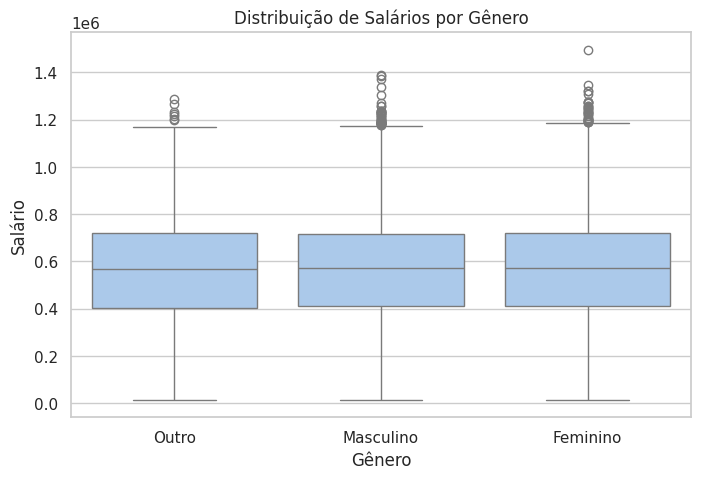

In [13]:
#Comparativo de Salário com Genero

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Gênero", y="Salário")
plt.title("Distribuição de Salários por Gênero")
plt.show()


## ✅ Conclusões Preliminares

- Há diferença salarial entre departamentos e gêneros?
- Existem outliers significativos?
- O tempo de empresa influencia no salário?

Esses pontos serão aprofundados na etapa de storytelling e visualização.